# Practical Machine Learning Assignment 1 Part A
Ryan Haggerty

Task/Problem Statement: 
The goal of this assignment is to explore the dataset and study the K-Nearest Neighbors
(K-NN) model for classification.
- Part A (this notebook): Model optimization via data standardization, feature selection, & varying threshold for a structured dataset
- Part B: Understanding the curse of dimensionality & the fundamental limitation of the K-NN model using an unstructured dataset

### Dataset

##### Description: 
The energy efficiency dataset EnergyEfficiencyCooling.csv is created to perform energy
analysis. The dataset comprises 768 samples and 8 features (X1 to X8). It has a realvalued target variable (Y) that represents the cooling load.

###### Source:
https://uofnelincoln-my.sharepoint.com/:x:/g/personal/mhasan2_unl_edu/EfLFOWLRq11OqPZSavPu7p4BQB6l2O6OjozAEn5u6iStcQ?e=GrHiWP


##### Input variables:
- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution

##### Output variable: 
- Y: Cooling Load



In [88]:
# Import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
import seaborn as sns
import warnings

## Load Data & Displat Dataset Information

In [3]:
# Load the CSV file as a Pandas DataFrame object. Name it “df”. Show the first five rows
df=pd.read_csv('/Users/ryguy/Documents/UNL/Classes/Practical Machine Learning/A01/EnergyEfficiencyCooling.csv', header=0)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


## Data Pre-processing and Analysis


<AxesSubplot:xlabel='Y', ylabel='Count'>

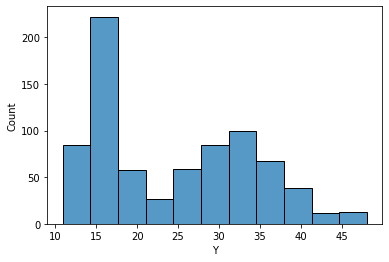

In [5]:
# Create a histogram plot of the target column Y
sns.histplot(data=df['Y'])

In [6]:
# Compute and show the total number of missing values in Y
print("Number of missing values in Y = " + df['Y'].isnull().sum().astype(str))

# Compute the median of Y
print("Median of Y = " + str(df['Y'].median()))

# Replace the missing values with the median
df['Y']=df['Y'].fillna(df['Y'].median())

# Display the first five values of the target column
df['Y'].head(5)

Number of missing values in Y = 5
Median of Y = 22.07


0    22.07
1    21.33
2    21.33
3    21.33
4    28.28
Name: Y, dtype: float64

In [7]:
# Convert the real-valued Y column into a binary-valued Y
df['Y'] = (df['Y'] >= 30).astype(np.int32)

In [8]:
# Compute the standard correlation coefficient (r) between the binary target Y and all features
df.corr()['Y'].sort_values(ascending=False)

Y     1.000000
X5    0.698836
X1    0.493199
X3    0.363103
X7    0.214287
X8    0.064858
X6    0.029765
X2   -0.526382
X4   -0.688658
Name: Y, dtype: float64

In [36]:
# Create a deep copy of the DataFrame object
df_main = df.copy()

# Create input matrix X and target vector y
X = df.drop("Y", axis=1)
y = df["Y"]

# Convert the feature and target DataFrame objects into NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Display the shape and data type of the feature and target arrays
print("Dimension of the features: ", X.shape)
print("Dimension of the target array: ", y.shape)
print("Data type of features: ", X.dtype)
print("Data type of target array: ", y.dtype)

Dimension of the features:  (768, 8)
Dimension of the target array:  (768,)
Data type of features:  float64
Data type of target array:  int32


<AxesSubplot:ylabel='Count'>

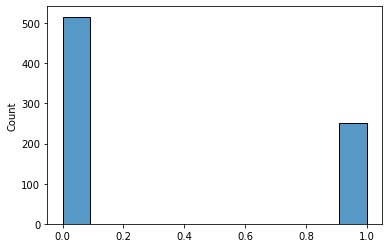

In [10]:
# Create a bar plot for the new target array to show the distribution of the samples in two classes
sns.histplot(y)

<AxesSubplot:>

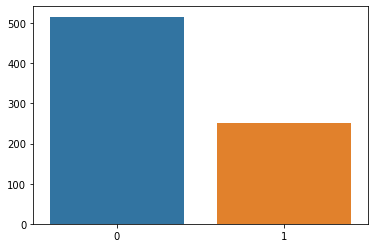

In [37]:
ones=np.count_nonzero(y==1)
zeros=np.count_nonzero(y==0)
a = ['0', '1']
b = [zeros, ones]
sns.barplot(a,b)

In [46]:
# Partition the dataset into training & test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Experiments
Perform binary classification using K-NN models for the following experiments. Do
hyperparameter tuning to determine optimal values for the following 3 hyperparameters:
n_neighbors, p, and weights.

## Experiment 1
All features & no standardization. Report train accuracy, test
accuracy, test precision, test recall, test F1 score, and test confusion matrix.

In [47]:
%%time
# apply GridSearchCV using parameters ranges specified above

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_exp1 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_exp1.fit(X_train, y_train)


params_optimal_knn_exp1 = knn_cv_exp1.best_params_

print("Best Score: %f" % knn_cv_exp1.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_exp1)
print("\n")

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Best Score: 0.892054
Optimal Hyperparameter Values:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Wall time: 3.34 s


In [48]:
# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_exp1 = KNeighborsClassifier(**params_optimal_knn_exp1)

knnbest_exp1.fit(X_train, y_train)

y_train_predicted_exp1 = knnbest_exp1.predict(X_train)

train_accuracy_knn_exp1 = np.mean(y_train_predicted_exp1 == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn_exp1)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_exp1 = cross_val_score(knnbest_exp1, X_train, y_train, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_exp1.mean(), scores_exp1.std() * 2))


Training Accuracy:  0.9560260586319218
Accuracy Score: 0.925 (+/- 0.03)


In [49]:
#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_exp1 = knnbest_exp1.predict(X_test)

test_accuracy_knn_exp1 = np.mean(y_test == y_test_pred_exp1)

print("Test Accuracy: ", test_accuracy_knn_exp1)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_exp1 = precision_score(y_test, y_test_pred_exp1) 
print("\nTest Precision = %f" % precision_test)

recall_test_exp1 = recall_score(y_test, y_test_pred_exp1)
print("Test Recall = %f" % recall_test)


f1_test_exp1 = f1_score(y_test, y_test_pred_exp1)
print("Test F1 Score = %f" % f1_test)

print("Test Confusion Matrix \n", confusion_matrix(y_test, y_test_pred_exp1))

Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.9090909090909091

Test Precision = 0.907407
Test Recall = 0.844828
Test F1 Score = 0.875000
Test Confusion Matrix 
 [[91  5]
 [ 9 49]]


## Experiment 2
All features & standardization. Report train accuracy, test
precision, test recall, test F1 score, and test confusion matrix. 

In [50]:
# Standardize the features
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [51]:
%%time
# apply GridSearchCV using parameters ranges specified above

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_exp2 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_exp2.fit(X_train_std, y_train)

# Define optimal parameters
params_optimal_knn_exp2 = knn_cv_exp2.best_params_

# Report optimal parameters
print("Best Score: %f" % knn_cv_exp2.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_exp2)
print("\n")

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Best Score: 0.926920
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Wall time: 3.85 s


In [52]:
# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_exp2 = KNeighborsClassifier(**params_optimal_knn_exp2)

knnbest_exp2.fit(X_train_std, y_train)

y_train_predicted_exp2 = knnbest_exp2.predict(X_train_std)

train_accuracy_knn_exp2 = np.mean(y_train_predicted_exp2 == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn_exp2)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_exp2 = cross_val_score(knnbest_exp2, X_train_std, y_train, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_exp2.mean(), scores_exp2.std() * 2))


Training Accuracy:  1.0
Accuracy Score: 0.951 (+/- 0.01)


In [53]:
#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_exp2 = knnbest_exp2.predict(X_test_std)

test_accuracy_knn_exp2 = np.mean(y_test == y_test_pred_exp2)

print("Test Accuracy: ", test_accuracy_knn_exp2)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_exp2 = precision_score(y_test, y_test_pred_exp2) 
print("\nTest Precision = %f" % precision_test)

recall_test_exp2 = recall_score(y_test, y_test_pred_exp2)
print("Test Recall = %f" % recall_test)


f1_test_exp2 = f1_score(y_test, y_test_pred_exp2)
print("Test F1 Score = %f" % f1_test)

print("Test Confusion Matrix \n", confusion_matrix(y_test, y_test_pred_exp2))

Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.9155844155844156

Test Precision = 0.907407
Test Recall = 0.844828
Test F1 Score = 0.875000
Test Confusion Matrix 
 [[91  5]
 [ 8 50]]


## Experiment 3
Generate the ROC curve, area under the curve (AUC) score, and the Precision-Recall (PR) curve for the model of experiment 2. Find the optimal threshold from the PR curve. Using the optimal threshold, compute train accuracy, test accuracy, test precision, test recall, test F1 score, and test confusion matrix. 

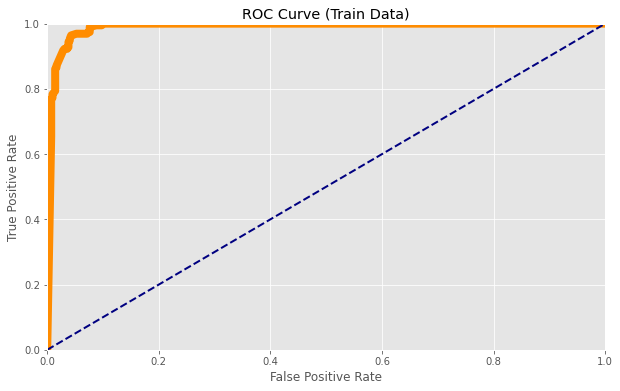

AUC =  0.9899239077074129


In [60]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
y_scores_exp3 = cross_val_predict(knnbest_exp2, X_train_std, y_train, method="predict_proba", cv=10)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores_exp3)

# Generate the ROC curve
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title(label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, "ROC Curve (Train Data)")
plt.show()
# Report the AUC
print("AUC = ",roc_auc_score(y_train,y_scores_exp3))

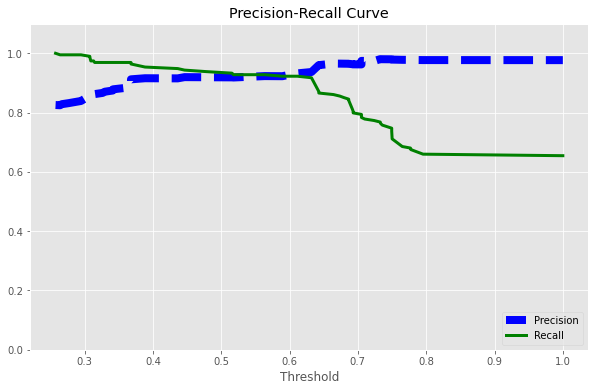

Optimal Threshold:  0.5894435558619412


In [68]:
# Generate the precision-recall curve for the model of Experiment 2
plt.style.use('ggplot')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_exp3)

fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Find and report the optimal threshold
threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

In [85]:
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for the optimal threshold

# Optimal threshold from precision-recall curve 
t = 0.589

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knnbest_exp2, X_train_std, y_train, method="predict_proba", cv=10)[:,1] > t).astype(int)

# Find training accuracy
train_accuracy_knn_exp3 = np.mean(y_train == y_train_predicted_new)

print("Train Accuracy: ", train_accuracy_knn_exp3)

# Find testing performance measures
y_test_predicted_new = (knnbest_exp2.predict_proba(X_test_std)[:,1] > t).astype(int)

test_accuracy_knn = np.mean(y_test == y_test_predicted_new)

print("\nTest Accuracy: ", test_accuracy_knn)


precision = precision_score(y_test, y_test_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_test, y_test_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_test, y_test_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))

print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_test, y_test_predicted_new))

Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):
Train Accuracy:  0.9511400651465798

Test Accuracy:  0.9090909090909091

Precision (Threshold 0.59) = 0.907407
Recall (Threshold 0.59) = 0.844828
F1 Score = (Threshold 0.59) = 0.875000
Confusion Matrix (Threshold 0.59)
[[91  5]
 [ 9 49]]


## Experiment 4
For this experiment,
use the df_main DataFrame object that you created in the pre-processing stage.
Before using it ensure that its Y column is binary-valued and of int type. You will
select multiple subsets (at least four) of features to train K-NN models. You may
use Pearson’s correlation coefficient to select features. Your goal would be to
increase the test accuracy. You are free to try any combination of the features.
Before creating a K-NN model, first, create NumPy feature and target
arrays from the DataFrame. Partition the dataset into training and test subsets as
before. Standardize the data. Then, perform hyperparameter tuning to find the
optimal model.
This process should be repeated for at least four combinations of features.
You may try more combinations. For each combination, show train accuracy, test
accuracy, test precision, test recall, test F1 score, and test confusion matrix.

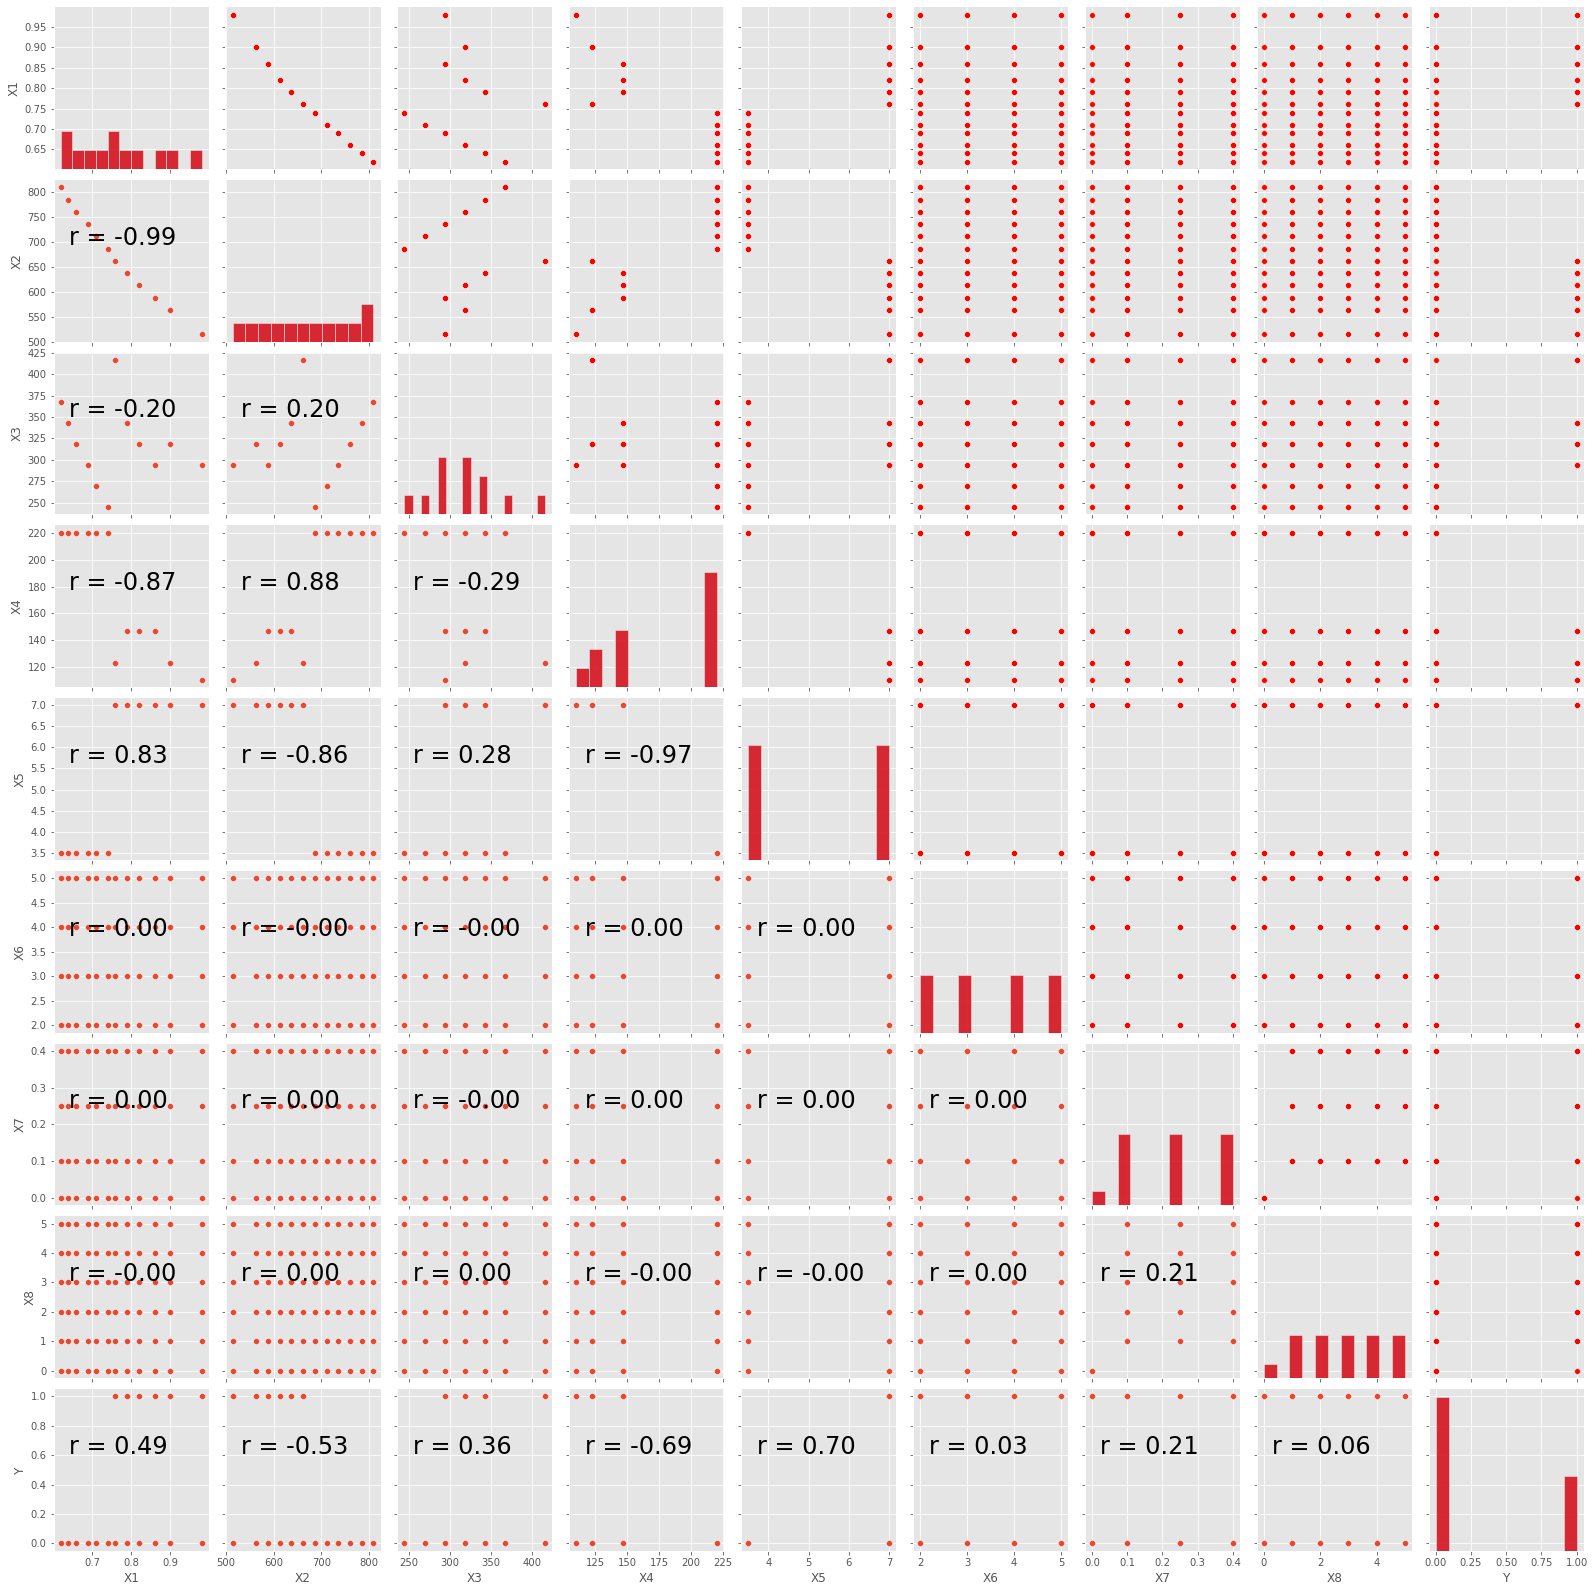

In [89]:
# Find redundant features through Pearson correlation
# Matplotlib and seaborn for plotting
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair plot
g = sns.pairplot(df_main)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
#g.map_diag(sns.distplot, kde=False, color = 'red') # distplot is deprecated
#g.map_diag(sns.displot, kde=False, color = 'red')
g.map_diag(sns.histplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
#g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

Feature pairs with high correlation:

- X4, X5
- X1, X2

Features with low target correlation:
- X6

Feature subsets:
- All excluding X2
- All excluding X5
- All excluding X6
- All excluding X2, X5, and X6

In [91]:
# Create input matrices X and target vector y
Xsub1 = df_main.drop(['X2','Y'], axis=1)
Xsub2 = df_main.drop(['X5','Y'], axis=1)
Xsub3 = df_main.drop(['X6','Y'], axis=1)
Xsub4 = df_main.drop(['X2','X5','X6','Y'], axis=1)
y = df["Y"]

# Convert the feature and target DataFrame objects into NumPy arrays
Xsub1 = Xsub1.to_numpy()
Xsub2 = Xsub2.to_numpy()
Xsub3 = Xsub3.to_numpy()
Xsub4 = Xsub4.to_numpy()
y = y.to_numpy()

# Partition the dataset into training & test subsets
X_train_sub1, X_test_sub1, y_train_exp4, y_test_exp4 = train_test_split(Xsub1, y, test_size=0.2, random_state=0)
X_train_sub2, X_test_sub2, y_train_exp4, y_test_exp4 = train_test_split(Xsub2, y, test_size=0.2, random_state=0)
X_train_sub3, X_test_sub3, y_train_exp4, y_test_exp4 = train_test_split(Xsub3, y, test_size=0.2, random_state=0)
X_train_sub4, X_test_sub4, y_train_exp4, y_test_exp4 = train_test_split(Xsub4, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()

# Fit on training set only. Apply transform to both the training set and the test set.
scaler.fit(X_train_sub1)
X_train_sub1 = scaler.transform(X_train_sub1)
X_test_sub1 = scaler.transform(X_test_sub1)

scaler.fit(X_train_sub2)
X_train_sub2 = scaler.transform(X_train_sub2)
X_test_sub2 = scaler.transform(X_test_sub2)

scaler.fit(X_train_sub3)
X_train_sub3 = scaler.transform(X_train_sub3)
X_test_sub3 = scaler.transform(X_test_sub3)

scaler.fit(X_train_sub4)
X_train_sub4 = scaler.transform(X_train_sub4)
X_test_sub4 = scaler.transform(X_test_sub4)

In [96]:
%%time
# Subset1

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_sub1 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_sub1.fit(X_train_sub1, y_train_exp4)

# Define optimal parameters
params_optimal_knn_sub1 = knn_cv_sub1.best_params_

# Report optimal parameters
print("Subset 1 Results-------------")
print("Best Score: %f" % knn_cv_sub1.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_sub1)
print("\n")

# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_sub1 = KNeighborsClassifier(**params_optimal_knn_sub1)

knnbest_sub1.fit(X_train_sub1, y_train_exp4)

y_train_predicted_sub1 = knnbest_sub1.predict(X_train_sub1)

train_accuracy_knn_sub1 = np.mean(y_train_predicted_sub1 == y_train_exp4)
print("\nTraining Accuracy: ", train_accuracy_knn_sub1)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_sub1 = cross_val_score(knnbest_sub1, X_train_sub1, y_train_exp4, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_sub1.mean(), scores_sub1.std() * 2))

#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_sub1 = knnbest_sub1.predict(X_test_sub1)

test_accuracy_knn_sub1 = np.mean(y_test_exp4 == y_test_pred_sub1)

print("Test Accuracy: ", test_accuracy_knn_sub1)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_sub1 = precision_score(y_test_exp4, y_test_pred_sub1) 
print("\nTest Precision = %f" % precision_test_sub1)

recall_test_sub1 = recall_score(y_test_exp4, y_test_pred_sub1)
print("Test Recall = %f" % recall_test_sub1)


f1_test_sub1 = f1_score(y_test_exp4, y_test_pred_sub1)
print("Test F1 Score = %f" % f1_test_sub1)

print("Test Confusion Matrix \n", confusion_matrix(y_test_exp4, y_test_pred_sub1))

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Best Score: 0.921605
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}



Training Accuracy:  0.9853420195439739
Accuracy Score: 0.946 (+/- 0.01)
Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.9025974025974026

Test Precision = 0.890909
Test Recall = 0.844828
Test F1 Score = 0.867257
Test Confusion Matrix 
 [[90  6]
 [ 9 49]]
Wall time: 7.1 s


In [98]:
%%time
# Subset2

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_sub2 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_sub2.fit(X_train_sub2, y_train_exp4)

# Define optimal parameters
params_optimal_knn_sub2 = knn_cv_sub2.best_params_

# Report optimal parameters
print("Subset 2 Results-------------")
print("Best Score: %f" % knn_cv_sub2.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_sub2)
print("\n")

# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_sub2 = KNeighborsClassifier(**params_optimal_knn_sub2)

knnbest_sub2.fit(X_train_sub2, y_train_exp4)

y_train_predicted_sub2 = knnbest_sub2.predict(X_train_sub2)

train_accuracy_knn_sub2 = np.mean(y_train_predicted_sub2 == y_train_exp4)
print("\nTraining Accuracy: ", train_accuracy_knn_sub2)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_sub2 = cross_val_score(knnbest_sub2, X_train_sub2, y_train_exp4, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_sub2.mean(), scores_sub2.std() * 2))

#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_sub2 = knnbest_sub2.predict(X_test_sub2)

test_accuracy_knn_sub2 = np.mean(y_test_exp4 == y_test_pred_sub2)

print("Test Accuracy: ", test_accuracy_knn_sub2)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_sub2 = precision_score(y_test_exp4, y_test_pred_sub1) 
print("\nTest Precision = %f" % precision_test_sub2)

recall_test_sub2 = recall_score(y_test_exp4, y_test_pred_sub2)
print("Test Recall = %f" % recall_test_sub2)


f1_test_sub2 = f1_score(y_test_exp4, y_test_pred_sub2)
print("Test F1 Score = %f" % f1_test_sub2)

print("Test Confusion Matrix \n", confusion_matrix(y_test_exp4, y_test_pred_sub2))

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Subset 2 Results-------------
Best Score: 0.926920
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}



Training Accuracy:  1.0
Accuracy Score: 0.951 (+/- 0.01)
Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.9155844155844156

Test Precision = 0.890909
Test Recall = 0.862069
Test F1 Score = 0.884956
Test Confusion Matrix 
 [[91  5]
 [ 8 50]]
Wall time: 3.14 s


In [99]:
%%time
# Subset3

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_sub3 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_sub3.fit(X_train_sub3, y_train_exp4)

# Define optimal parameters
params_optimal_knn_sub3 = knn_cv_sub3.best_params_

# Report optimal parameters
print("Subset 2 Results-------------")
print("Best Score: %f" % knn_cv_sub3.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_sub3)
print("\n")

# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_sub3 = KNeighborsClassifier(**params_optimal_knn_sub3)

knnbest_sub3.fit(X_train_sub3, y_train_exp4)

y_train_predicted_sub3 = knnbest_sub3.predict(X_train_sub3)

train_accuracy_knn_sub3 = np.mean(y_train_predicted_sub3 == y_train_exp4)
print("\nTraining Accuracy: ", train_accuracy_knn_sub3)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_sub3 = cross_val_score(knnbest_sub3, X_train_sub3, y_train_exp4, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_sub3.mean(), scores_sub3.std() * 2))

#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_sub3 = knnbest_sub3.predict(X_test_sub3)

test_accuracy_knn_sub3 = np.mean(y_test_exp4 == y_test_pred_sub3)

print("Test Accuracy: ", test_accuracy_knn_sub3)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_sub3 = precision_score(y_test_exp4, y_test_pred_sub3) 
print("\nTest Precision = %f" % precision_test_sub3)

recall_test_sub3 = recall_score(y_test_exp4, y_test_pred_sub3)
print("Test Recall = %f" % recall_test_sub3)


f1_test_sub3 = f1_score(y_test_exp4, y_test_pred_sub3)
print("Test F1 Score = %f" % f1_test_sub3)

print("Test Confusion Matrix \n", confusion_matrix(y_test_exp4, y_test_pred_sub3))

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Subset 2 Results-------------
Best Score: 0.881697
Optimal Hyperparameter Values:  {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}



Training Accuracy:  0.9348534201954397
Accuracy Score: 0.915 (+/- 0.05)
Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.8961038961038961

Test Precision = 0.888889
Test Recall = 0.827586
Test F1 Score = 0.857143
Test Confusion Matrix 
 [[90  6]
 [10 48]]
Wall time: 2.81 s


In [100]:
%%time
# Subset4

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,21,23,33,35,37], 'p': [1, 2, 3, 5, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv_sub4 = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv_sub4.fit(X_train_sub4, y_train_exp4)

# Define optimal parameters
params_optimal_knn_sub4 = knn_cv_sub4.best_params_

# Report optimal parameters
print("Subset 2 Results-------------")
print("Best Score: %f" % knn_cv_sub4.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_sub4)
print("\n")

# Train Scikit-Learn’s KNeighborsClassifier model using the optimal hyperparameter values obtained from GridSearchCV
knnbest_sub4 = KNeighborsClassifier(**params_optimal_knn_sub4)

knnbest_sub4.fit(X_train_sub4, y_train_exp4)

y_train_predicted_sub4 = knnbest_sub4.predict(X_train_sub4)

train_accuracy_knn_sub4 = np.mean(y_train_predicted_sub4 == y_train_exp4)
print("\nTraining Accuracy: ", train_accuracy_knn_sub4)

# Evaluate the model on the train data using the cross_val_score function and report the average accuracy.
scores_sub4 = cross_val_score(knnbest_sub4, X_train_sub4, y_train_exp4, scoring='accuracy', cv=5)

print("Accuracy Score: %0.3f (+/- %0.2f)" % (scores_sub4.mean(), scores_sub4.std() * 2))

#Test model
print("Test: Performance Measures Based on the Default Threshold (0.5):\n")

# Report test accuracy, test precision, test recall, test F1 score, and test confusion matrix
y_test_pred_sub4 = knnbest_sub4.predict(X_test_sub4)

test_accuracy_knn_sub4 = np.mean(y_test_exp4 == y_test_pred_sub4)

print("Test Accuracy: ", test_accuracy_knn_sub4)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_test_sub4 = precision_score(y_test_exp4, y_test_pred_sub4) 
print("\nTest Precision = %f" % precision_test_sub4)

recall_test_sub4 = recall_score(y_test_exp4, y_test_pred_sub4)
print("Test Recall = %f" % recall_test_sub4)


f1_test_sub4 = f1_score(y_test_exp4, y_test_pred_sub4)
print("Test F1 Score = %f" % f1_test_sub4)

print("Test Confusion Matrix \n", confusion_matrix(y_test_exp4, y_test_pred_sub4))

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Subset 2 Results-------------
Best Score: 0.871444
Optimal Hyperparameter Values:  {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}



Training Accuracy:  0.9267100977198697
Accuracy Score: 0.919 (+/- 0.05)
Test: Performance Measures Based on the Default Threshold (0.5):

Test Accuracy:  0.8896103896103896

Test Precision = 0.901961
Test Recall = 0.793103
Test F1 Score = 0.844037
Test Confusion Matrix 
 [[91  5]
 [12 46]]
Wall time: 2.66 s
